In [1]:
# Importo las librerias
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Importo el dataframe
df = pd.read_csv('ds_salaries.csv')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Elimino las columnas que no voy a utilzar para el analisis
df = df.drop(columns=['salary', 'salary_currency'])

In [4]:
# Compruebo que se hayan eliminado las columnas
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [5]:
# Analisis descriptivo del dataframe
df.shape

(3755, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.2+ KB


In [7]:
# Busco valores nulos
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Busco los valores unicos
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

# Analisis Univariante

In [9]:
exp_level = df['experience_level'].unique()
exp_level

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

Tengo cuatro niveles diferentes de experiencia

    SE = Senior
    MI = Semi-senior
    EN = Junior o entry level
    EX = ejecutivo o executive

In [10]:
# Busco la cantidad de valores por nivel de experiencia
experience_count = df['experience_level'].value_counts()
experience_count

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [17]:
# Busco el porcentaje
exp_level_percent = experience_count / df['experience_level'].count()
exp_level_percent = exp_level_percent *100
exp_level_percent

SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: experience_level, dtype: float64

Este dato nos dice lo siguiente: 

* El 67% de los data scientist consultados tienen nivel "Senior"
* El 21,4% de los data scientist consultados tienen nivel "Semi-senior"
* El 8,5% de los data scientist consultados tienen nivel "Junior"
* El 3% de los data scientist consultados tienen nivel "Ejecutivo"


<Axes: ylabel='experience_level'>

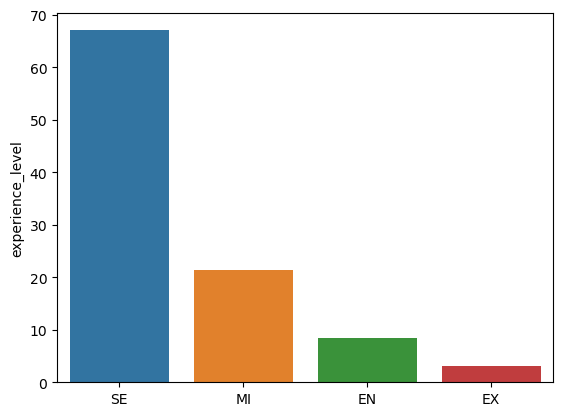

In [15]:
# Grafico los porcentajes
sns.barplot(x=exp_level, y=exp_level_percent)

# Analisis por tipo de empleado

In [22]:
type_rol_employ = df.employment_type.value_counts()
type_rol_employ

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [25]:
total_emp_count = df.employment_type.count()
total_emp_count

3755

In [27]:
# Analizo los porcentajes de los roles
rol_percent = type_rol_employ /total_emp_count
rol_percent

FT    0.990146
PT    0.004527
CT    0.002663
FL    0.002663
Name: employment_type, dtype: float64

# El 99% de los data scientist consultados trabajan "Full Time"